In [10]:
import pandas as pd
import seaborn as sns
df= sns.load_dataset('iris')

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df['label']=df.species.map({'setosa':1, 'versicolor':2, 'virginica':3})

In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'label'],
      dtype='object')

In [16]:
df.shape

(150, 6)

In [17]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
label           False
dtype: bool

<AxesSubplot:ylabel='species'>

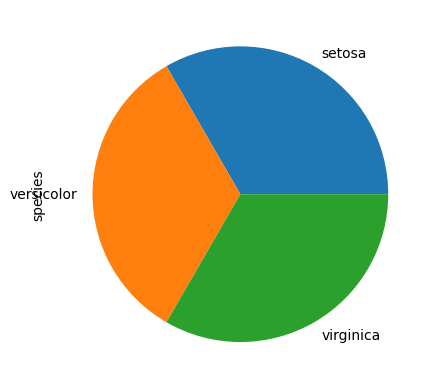

In [18]:
df.species.value_counts().plot(kind="pie")

<AxesSubplot:>

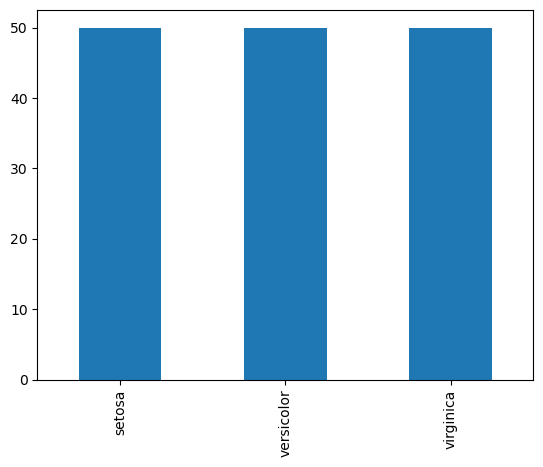

In [19]:
df.species.value_counts().plot(kind="bar")

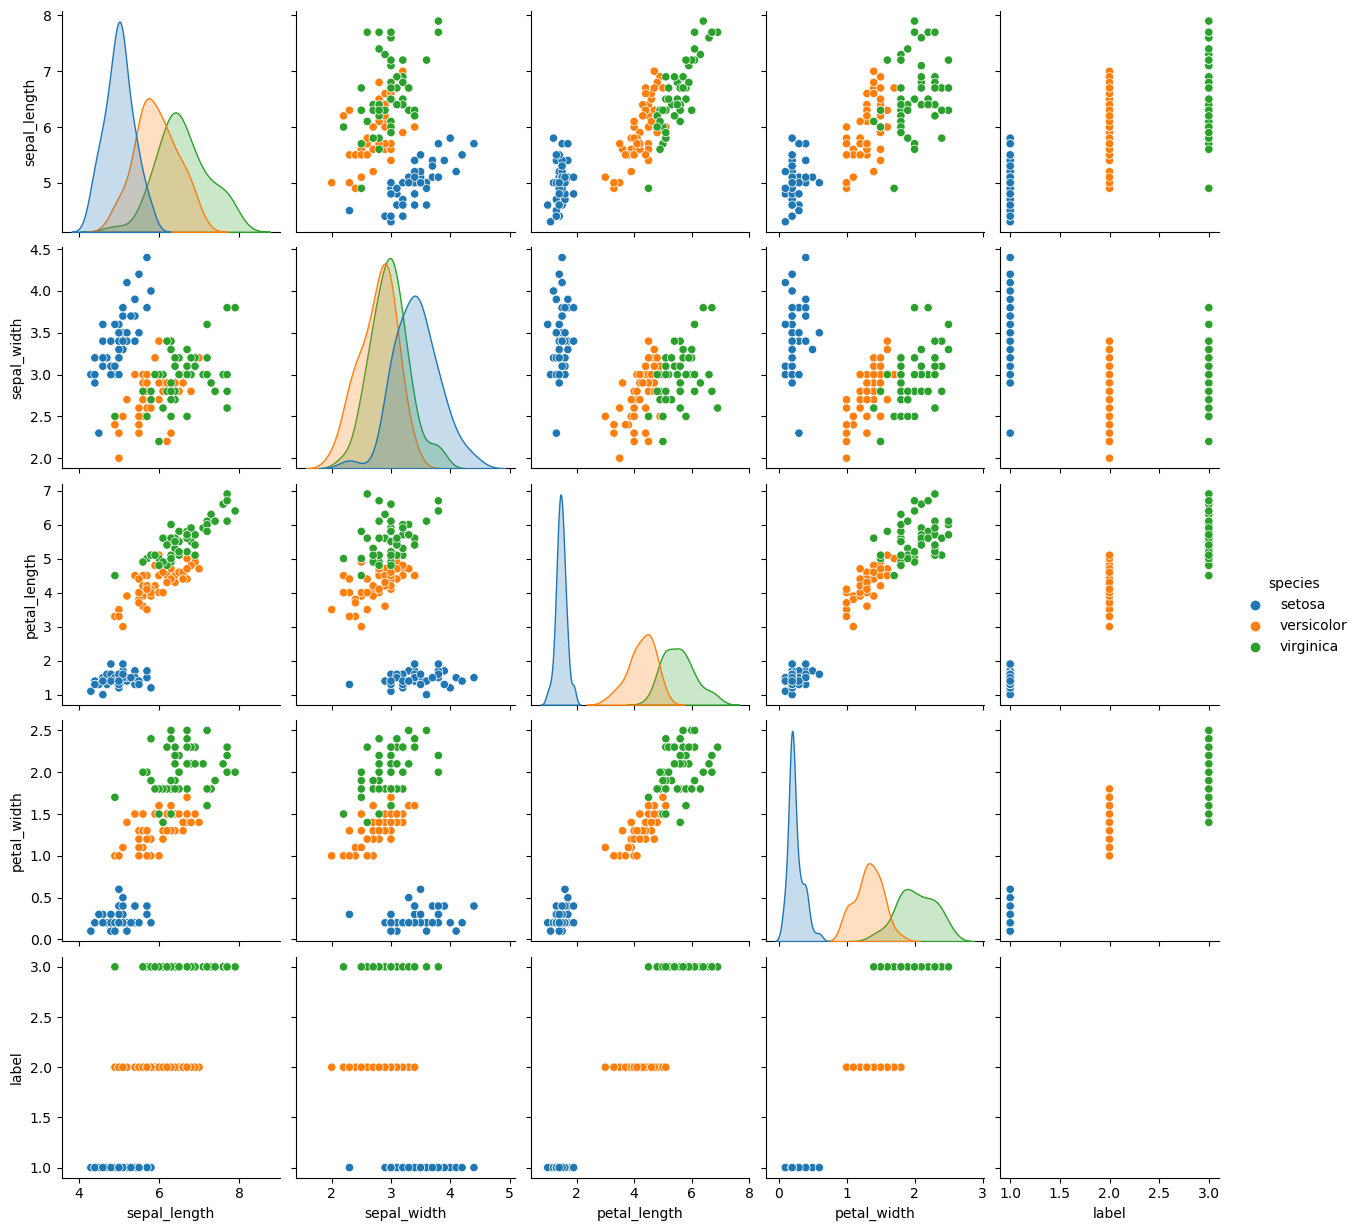

In [20]:
 sns.pairplot(df, hue='species')

In [21]:
from sklearn.model_selection import train_test_split
x=df.drop(['species', 'label'],axis=1)
y=df['label']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.10)

# decision tree

In [22]:
#from sklearn.tree import DecisionTreeCLassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix, accuracy_score

dtree = DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)
dtree_model=dtree.predict(xtest)

print(classification_report(ytest, dtree_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.86      1.00      0.92         6
           3       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.95      0.95      0.95        15
weighted avg       0.94      0.93      0.93        15



In [23]:
multilabel_confusion_matrix(ytest,dtree_model)

array([[[13,  0],
        [ 0,  2]],

       [[ 8,  1],
        [ 0,  6]],

       [[ 8,  0],
        [ 1,  6]]], dtype=int64)

[Text(0.5357142857142857, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [48, 44, 43]'),
 Text(0.4642857142857143, 0.75, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]'),
 Text(0.6071428571428571, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 87\nvalue = [0, 44, 43]'),
 Text(0.35714285714285715, 0.5833333333333334, 'X[2] <= 5.05\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[0] <= 4.95\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1]'),
 Text(0.14285714285714285, 0.25, 'X[2] <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.5, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.42857142857142855, 

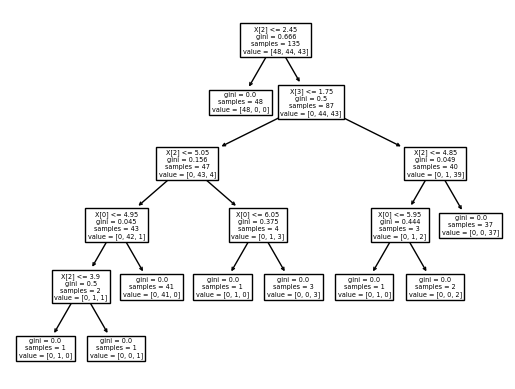

In [24]:
from sklearn import tree
tree.plot_tree(dtree)#many methods

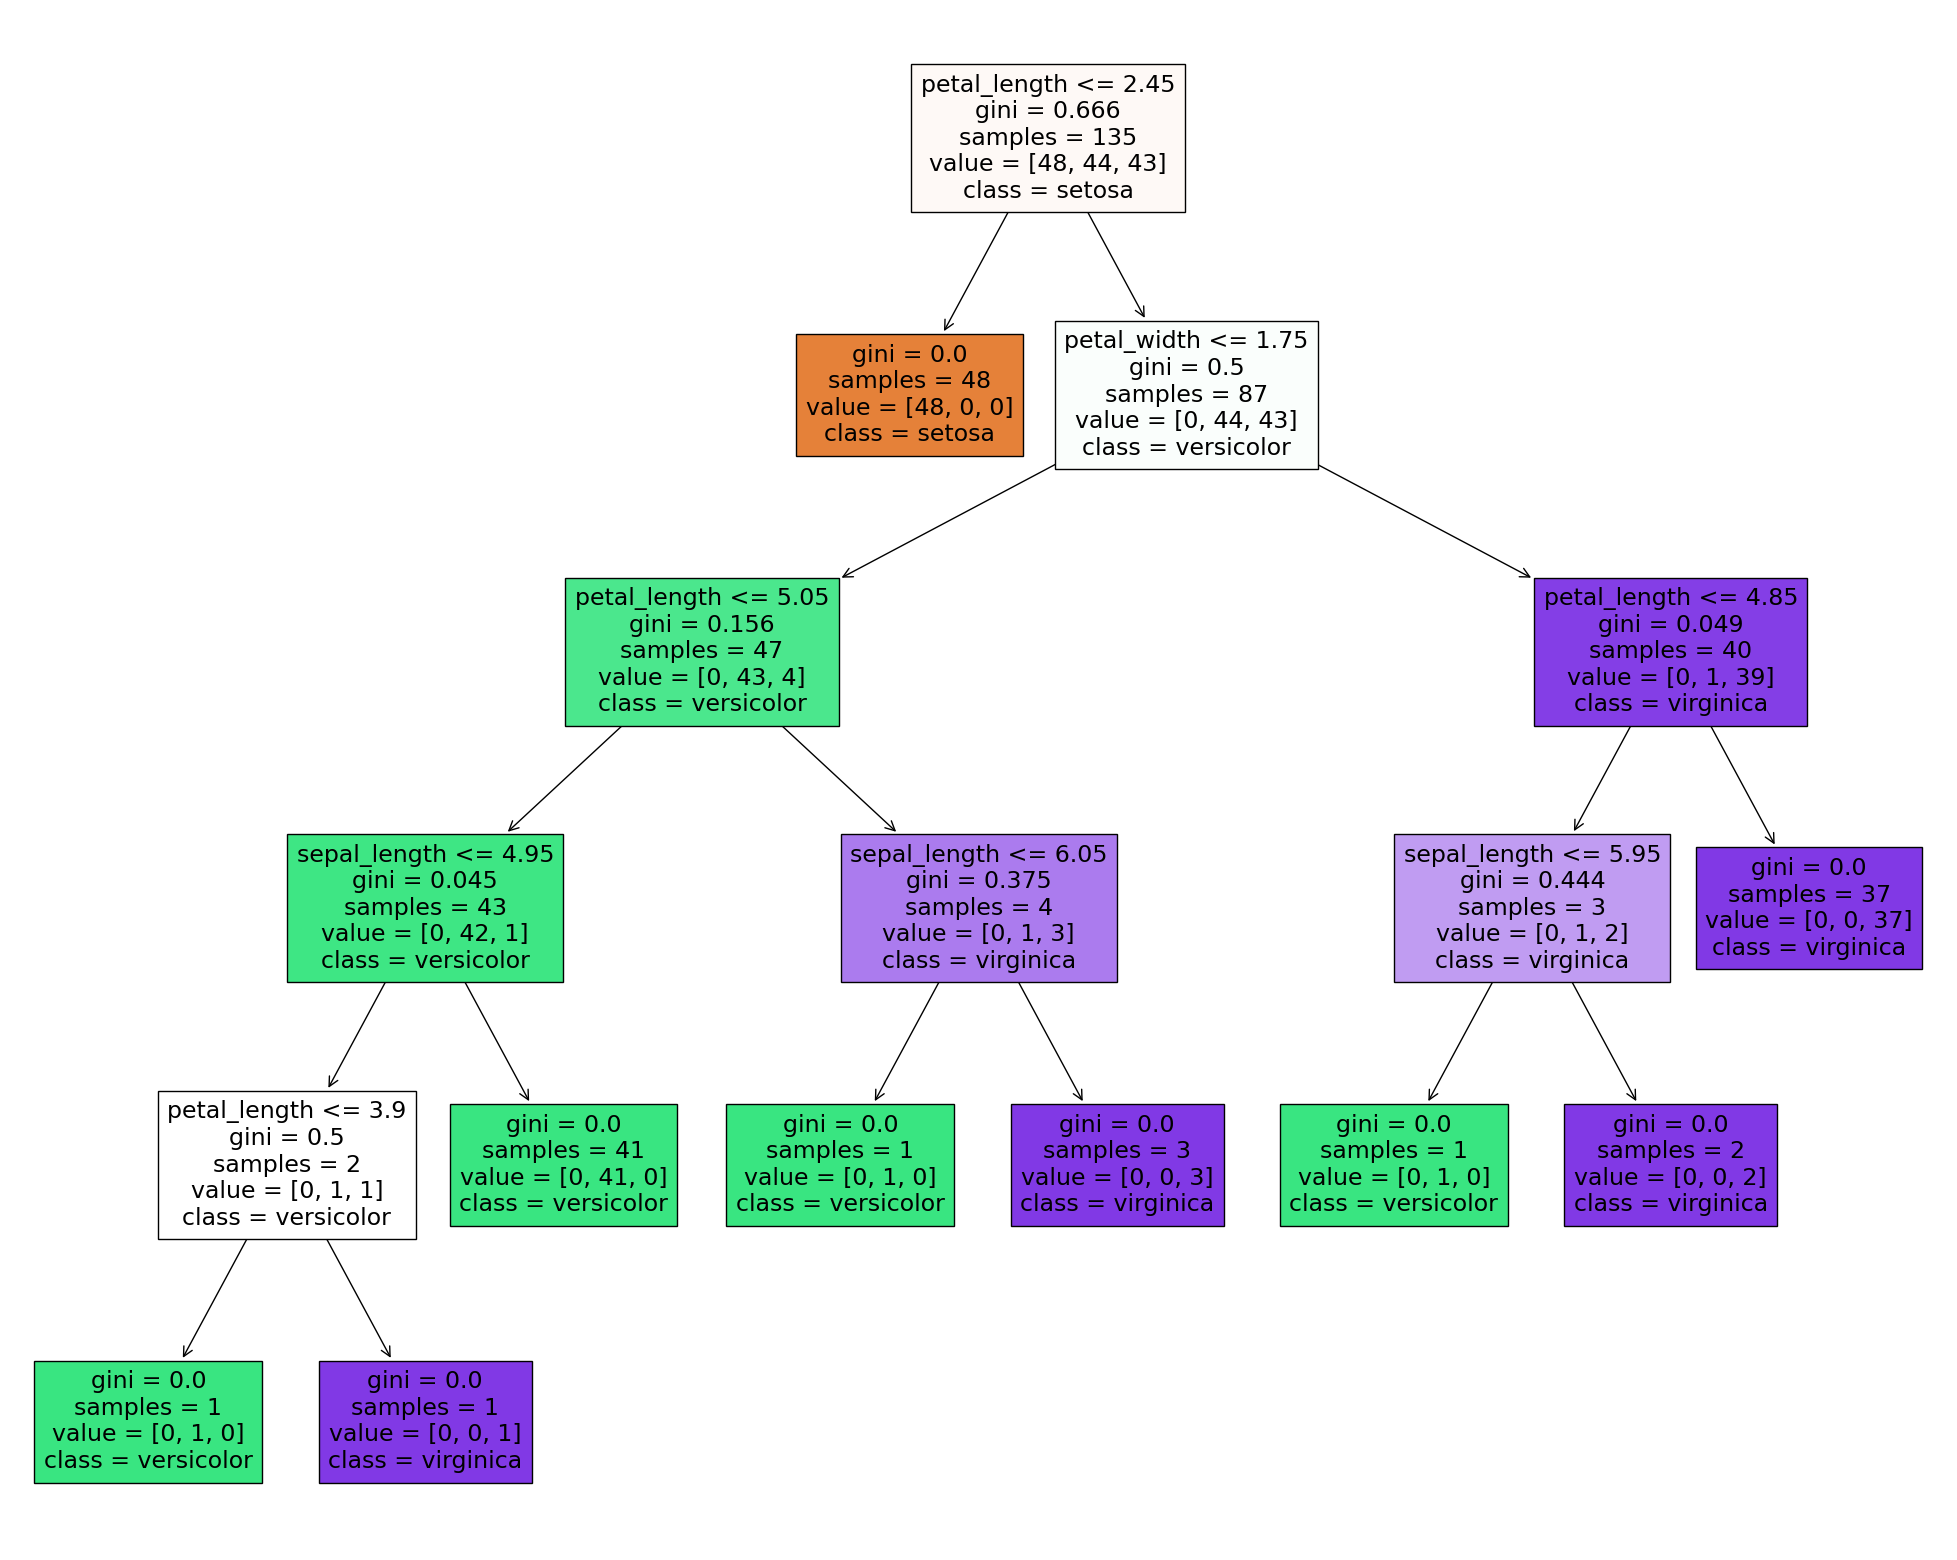

In [54]:
import matplotlib.pyplot as plt
def get_dt_graph(dt_classifier):
    fig=plt.figure(figsize=(25,20))
    _=tree.plot_tree(dt_classifier,
                    feature_names=x.columns,
                    class_names=['setosa','versicolor','virginica'],
                    filled=True)
get_dt_graph(dtree)

# model evaluation

In [28]:
print('training accuracy=',accuracy_score(ytrain,dtree.predict(xtrain)))#check if testing accuracy is less and is evaluating the model
print('testing accuracy=',accuracy_score(ytest,dtree.predict(xtest)))


training accuracy= 1.0
testing accuracy= 0.9333333333333333


In [38]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV , KFold
dtree_hp=DecisionTreeClassifier(random_state=43)
params={'max_depth':[2,3,5,10,15],
       'min_samples_leaf':[3,5,10,15,20],
       'min_samples_split':[8,10,12,18,20,16],
       'criterion':['gini','entropy']}
dtree_cv=KFold(n_splits=5)
GS = GridSearchCV(estimator=dtree_hp,param_grid=params,cv=dtree_cv, n_jobs=-1,verbose=True, scoring='accuracy')

In [39]:
%%time
dtree_best=GS.fit(xtrain,ytrain)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Wall time: 8.11 s


In [45]:
#for detailed analysis
type(GS.cv_results_)
df3=pd.DataFrame(GS.cv_results_)
df3.head(3)
#best parameters and such for each datapoints

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025341,0.012671,0.000000,0.000000,gini,2,3,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,0.888889,0.962963,0.962963,0.962963,0.955556,0.036289,49
1,0.001069,0.001319,0.003691,0.006643,gini,2,3,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,0.888889,0.962963,0.962963,0.962963,0.955556,0.036289,49
2,0.000306,0.000612,0.000000,0.000000,gini,2,3,12,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,0.888889,0.962963,0.962963,0.962963,0.955556,0.036289,49


In [48]:
#after fit
print("best parameter combination=",GS.best_params_)
print("Best score",GS.best_score_)

best parameter combination= {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}
Best score 0.962962962962963


In [49]:
print('training accuracy=',accuracy_score(ytrain,GS.predict(xtrain)))
print('testing accuracy=',accuracy_score(ytest,GS.predict(xtest)))


training accuracy= 0.9777777777777777
testing accuracy= 0.9333333333333333


In [57]:
#tree.plot_tree(GS)

# knearest neighbour

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain,ytrain)
knn_model=knn.predict(xtest)
print(classification_report(ytest,knn_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



C:\Users\91807\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
print('training accuracy=',accuracy_score(ytrain,knn.predict(xtrain)))
print('testing accuracy=',accuracy_score(ytest,knn.predict(xtest)))

training accuracy= 0.9703703703703703
testing accuracy= 1.0


C:\Users\91807\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\91807\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [71]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV , KFold
knn_hp=KNeighborsClassifier()
params={'n_neighbo0rs':[3,5,7,9,11,13,15,2],
       'weights':['uniform','distance'],
       'min_samples_split':[8,10,12,18,20,16],
       'metric':['minkowski','euclidean','manhattan']}
knn_cv=KFold(n_splits=5)
GS = GridSearchCV(estimator=dtree_hp,param_grid=params,cv=knn_cv, n_jobs=-1,verbose=True, scoring='accuracy')

In [78]:

knn_best=GS.fit(xtrain,ytrain)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


ValueError: Invalid parameter metric for estimator DecisionTreeClassifier(random_state=43). Check the list of available parameters with `estimator.get_params().keys()`.

# random forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf_model=rf.predict(xtest)
print(classification_report(ytest,rf_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.86      1.00      0.92         6
           3       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.95      0.95      0.95        15
weighted avg       0.94      0.93      0.93        15



# gradientboosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(n_estimators=100)
gb.fit(xtrain,ytrain)
gb_model=gb.predict(xtest)
print(classification_report(ytest,gb_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.86      1.00      0.92         6
           3       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.95      0.95      0.95        15
weighted avg       0.94      0.93      0.93        15

